In [1]:

pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bd3d9b60ba3ccd1a4f9cdf7473c2ad4355886a602d27d5bf94491231c6ffbbf8
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


ValueError: ignored

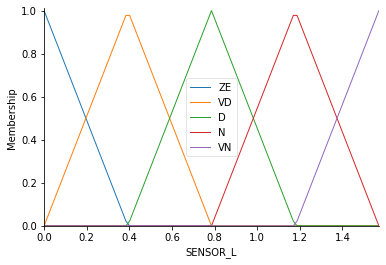

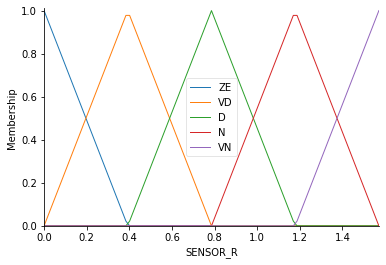

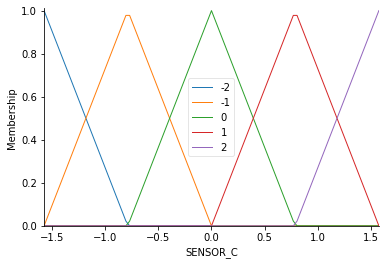

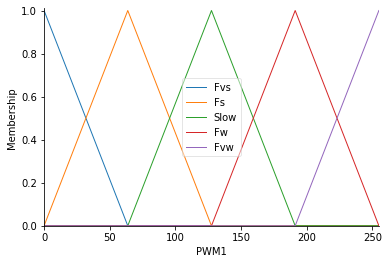

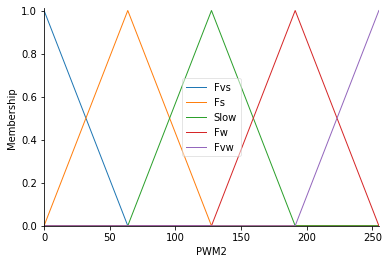

In [4]:
# đkmobile robot

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe0 = np.linspace(0,np.pi/2,91)
universe1 = np.linspace(-np.pi/2,np.pi/2,91)
universe2 = np.linspace(0,255,61)
#Input
SENSOR_L=ctrl.Antecedent(universe0,'SENSOR_L')
SENSOR_R=ctrl.Antecedent(universe0,'SENSOR_R')
SENSOR_C=ctrl.Antecedent(universe1,'SENSOR_C')

#Output
PWM1=ctrl.Consequent(universe2,'PWM1')
PWM2=ctrl.Consequent(universe2,'PWM2')
name_L=['ZE','VD','D','N','VN']
name_R=['ZE','VD','D','N','VN']
name_C=['-2','-1','0','1','2']
name_1=['Fvs','Fs','Slow','Fw','Fvw']
name_2=['Fvs','Fs','Slow','Fw','Fvw']

SENSOR_L.automf(names=name_L)
SENSOR_R.automf(names=name_R)
SENSOR_C.automf(names=name_C)
PWM1.automf(names=name_1)
PWM2.automf(names=name_2)

SENSOR_L.view()
SENSOR_R.view()
SENSOR_C.view()
PWM1.view()
PWM2.view()

rule1=ctrl.Rule(antecedent=((SENSOR_L['ZE'] & SENSOR_C['-2'])|(SENSOR_L['ZE'] &  SENSOR_C['-1'])|
                            (SENSOR_L['ZE'] &  SENSOR_C['0'])|(SENSOR_L['L'] &  SENSOR_C['-2']))
                            ,consequent=PWM1['Fvs'],label='rule Fvs')
rule2=ctrl.Rule(antecedent=((SENSOR_L['D'] &  SENSOR_C['-2'])|(SENSOR_L['L'] &  SENSOR_C['-1'])|
                            (SENSOR_L['D'] &  SENSOR_C['-1'])|(SENSOR_L['L'] &  SENSOR_C['0'])|
                            (SENSOR_L['ZE'] &  SENSOR_C['1'])|(SENSOR_L['ZE'] &  SENSOR_C['2']))
                            ,consequent=PWM1['Fs'],label='rule Fs')
rule3=ctrl.Rule(antecedent=((SENSOR_L['H'] &  SENSOR_C['-2'])|(SENSOR_L['H'] &  SENSOR_C['-1'])|
                            (SENSOR_L['D'] &  SENSOR_C['0'])|(SENSOR_L['L'] &  SENSOR_C['1'])|
                            (SENSOR_L['L'] &  SENSOR_C['2'])),consequent=PWM1['Slow'],label='rule Slow')
rule4=ctrl.Rule(antecedent=((SENSOR_L['VH'] &  SENSOR_C['-2'])|(SENSOR_L['VH'] &  SENSOR_C['-1'])|
                            (SENSOR_L['H'] &  SENSOR_C['0'])|(SENSOR_L['H'] &  SENSOR_C['1'])|
                            (SENSOR_L['D'] &  SENSOR_C['1'])|(SENSOR_L['D'] &  SENSOR_C['2']))
                            ,consequent=PWM1['Fw'],label='rule Fw')
rule5=ctrl.Rule(antecedent=((SENSOR_L['VH'] &  SENSOR_C['0'])|(SENSOR_L['VH'] &  SENSOR_C['1'])|
                            (SENSOR_L['VH'] &  SENSOR_C['2'])|(SENSOR_L['H'] &  SENSOR_C['2']))
                            ,consequent=PWM1['Fvw'],label='rule Fvw')
#Control system
F_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
Force_sim=ctrl.ControlSystemSimulation(F_ctrl)

Force_sim.input['SENSOR_L'] = np.pi/6
Force_sim.input['SENSOR_C'] = 0
Force_sim.compute()
print(Force_sim.output['PWM'])
PWM1.view(sim = Force_sim)
# # vẽ 3d 
# d_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
# d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
# upsampled1=np.linspace(18,30,61)
# upsampled2=np.linspace(-5,60,61)
# x,y = np.meshgrid(upsampled1,upsampled2)
# z = np.zeros_like(x)

# for i in range(61):
#   for j in range(61):
#     d_simulation.input['SENSOR_L']=x[i,j]
#     d_simulation.input['SENSOR']=y[i,j]
#     d_simulation.compute()
#     z[i,j]=d_simulation.output['PWM']

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111,projection = '3d')
# suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
# ax.view_init(30,200)